In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
sns.set("talk","ticks",font_scale=1,font="sans-serif",color_codes=True)
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import rcParams
plt.rcParams["figure.dpi"] = 300
from lifelines.datasets import load_waltons
from lifelines import *
from lifelines.utils import survival_table_from_events
df = load_waltons()
df.head()

,T,E,group
0,6.0,1,miR-137
1,13.0,1,miR-137
2,13.0,1,miR-137
3,13.0,1,miR-137
4,19.0,1,miR-137


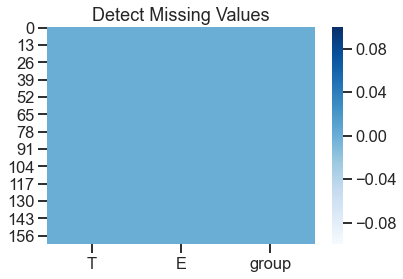

In [2]:
sns.heatmap(df.isnull(),cmap="Blues")
plt.title("Detect Missing Values")
plt.show()

In [3]:
T = df["T"]
E = df["E"]

In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
T,163.0,49.613497,17.078007,6.0,41.0,56.0,61.0,75.0
E,163.0,0.957055,0.203357,0.0,1.0,1.0,1.0,1.0


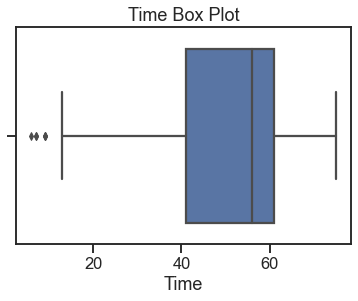

In [5]:
sns.boxplot(df["T"])
plt.title("Time Box Plot")
plt.xlabel("Time")
plt.show()

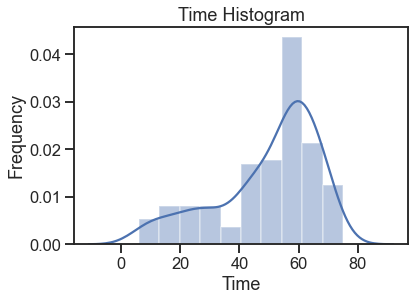

In [6]:
sns.distplot(df["T"])
plt.title("Time Histogram")
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.show()


In [7]:
table = survival_table_from_events(T,E)
table.head(5)

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,0,0,0,163,163
6.0,1,1,0,0,163
7.0,2,1,1,0,162
9.0,3,3,0,0,160
13.0,3,3,0,0,157


In [8]:
kmf = KaplanMeierFitter().fit(T,E)

In [9]:
cum = kmf.cumulative_density_
cum.head(5)

,KM_estimate
timeline,
0.0,0.000000
6.0,0.006135
7.0,0.012270
9.0,0.030790
13.0,0.049310


In [10]:
surv = kmf.survival_function_
surv.head(5)

,KM_estimate
timeline,
0.0,1.000000
6.0,0.993865
7.0,0.987730
9.0,0.969210
13.0,0.950690


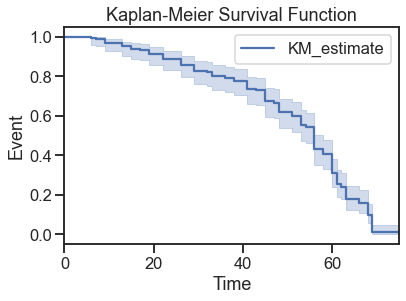

In [11]:
kmf.plot_survival_function()
plt.title("Kaplan-Meier Survival Function")
plt.xlabel("Time")
plt.ylabel("Event")
plt.show()

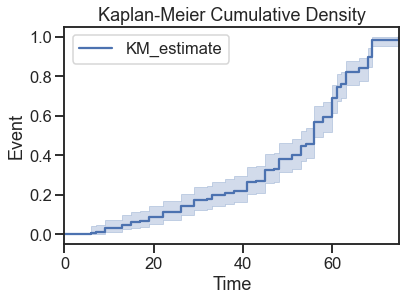

In [12]:
kmf.plot_cumulative_density()
plt.title("Kaplan-Meier Cumulative Density")
plt.xlabel("Time")
plt.ylabel("Event")
plt.show()

In [ ]:
qq_plot(kmf)

In [13]:
nal = NelsonAalenFitter().fit(T,E)

In [14]:
haz = nal.cumulative_hazard_
haz.head(5)

,NA_estimate
timeline,
0.0,0.000000
6.0,0.006135
7.0,0.012308
9.0,0.031176
13.0,0.050408


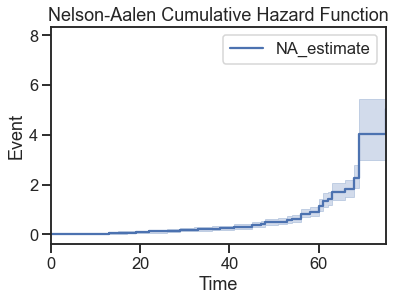

In [15]:
nal.plot_cumulative_hazard()
plt.title("Nelson-Aalen Cumulative Hazard Function")
plt.ylabel("Event")
plt.xlabel("Time")
plt.show()

In [16]:
from lifelines.datasets import load_regression_dataset
df2 = load_regression_dataset()
df2.head()

,var1,var2,var3,T,E
0,0.595170,1.143472,1.571079,14.785652,1
1,0.209325,0.184677,0.356980,7.335846,1
2,0.693919,0.071893,0.557960,5.269797,1
3,0.443804,1.364646,0.374221,11.684092,1
4,1.613324,0.125566,1.921325,7.639492,1


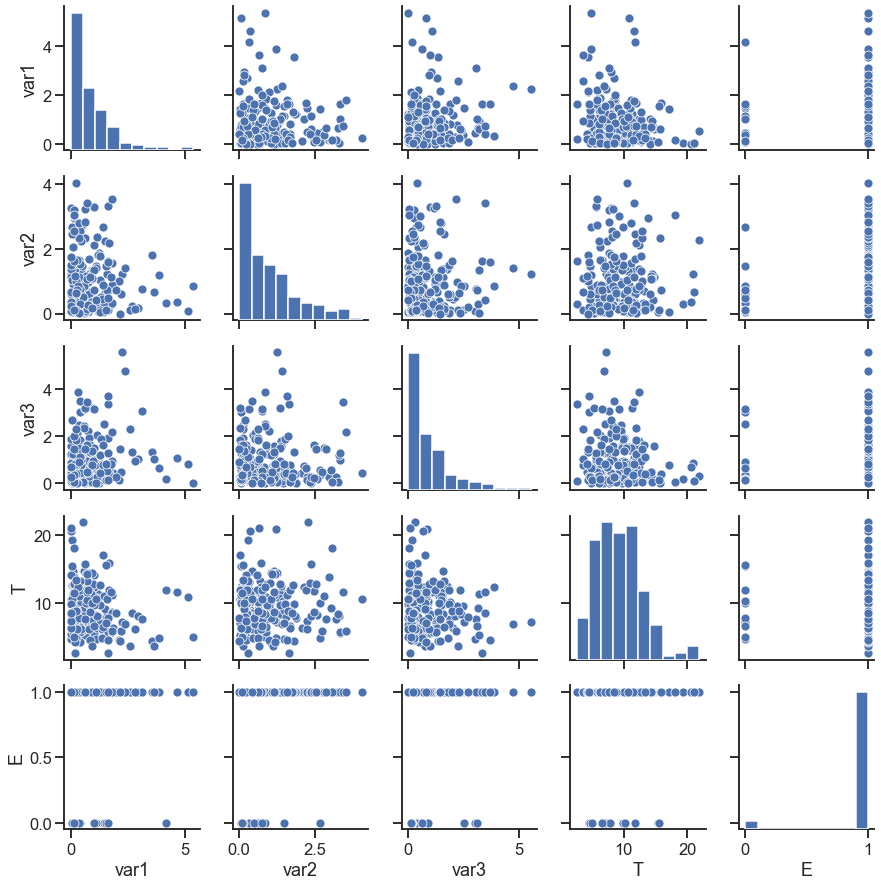

In [17]:
sns.pairplot(df2)

In [18]:
cph = CoxPHFitter().fit(df2,"T",event_col="E")
cph.print_summary()

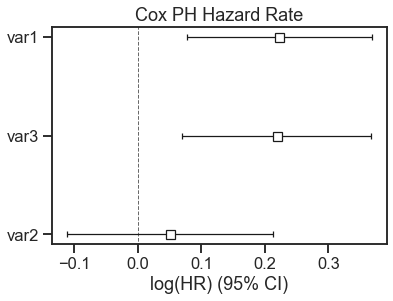

In [19]:
cph.plot()
plt.title("Cox PH Hazard Rate")
plt.show()